In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [4]:
data = pd.read_csv('world-food-facts/FoodFacts.csv')

/Users/billkoo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Select foods that are shared by more than 1 country, then prepare it for tokenization by replacing space with "_".  

Then vectorize the list [['France', 'Spain'],['France', 'Sweden']] to matrix form:


|        | France | Spain | Sweden |
|--------|--------|-------|--------|
| France | 0      | 1     | 1      |
| Spain  | 1      | 0     | 0      |
| Sweden | 1      | 0     | 0      |

In [5]:
data_clean = data[data['countries_en'] == data['countries_en']]
shared_food = data_clean[data_clean['countries_en'].str.contains(',')]['countries_en']
shared_food = shared_food.apply(lambda x: x.strip().replace(" ", "_"))
count_model = CountVectorizer(ngram_range=(1,1))
X = count_model.fit_transform(list(shared_food))
Xc = (X.T * X)
Xc.setdiag(0)

Further clean up the matrix ('fr' to 'france'). Select only countries with at least 10 countries with shared food.  

Then double-normalize the matrix on x and y axis. This way countries with large amount of entries such as France will not dominate the food influencer network.  

Make heatmap graph.

In [78]:
shared_food_matrix = pd.DataFrame(Xc.todense(), 
    columns=count_model.get_feature_names(),
    index=count_model.get_feature_names())
shared_food_matrix['france'] = shared_food_matrix['france'] + shared_food_matrix['fr']
shared_food_matrix['spain'] = shared_food_matrix['spain'] + shared_food_matrix['es']
shared_food_matrix = shared_food_matrix.drop(['es','fr'], 0)
shared_food_matrix = shared_food_matrix.drop(['es','fr'], 1)
total = shared_food_matrix.sum()
plot_matrix = shared_food_matrix[total[total.sort_values(ascending=False)>=10
    ].index].loc[total[total.sort_values(ascending=False)>=10].index]
plot_matrix = plot_matrix.apply(lambda x: x/x.sum(),axis=0).apply(lambda x: x/x.sum(),axis=1)

Darker color means the country on y axis has a lot of shared food with the country on the x axis. There are some pretty interesting findings, for example New Zealandic food has a lot in common with, besides Australian, Czech cuisine!

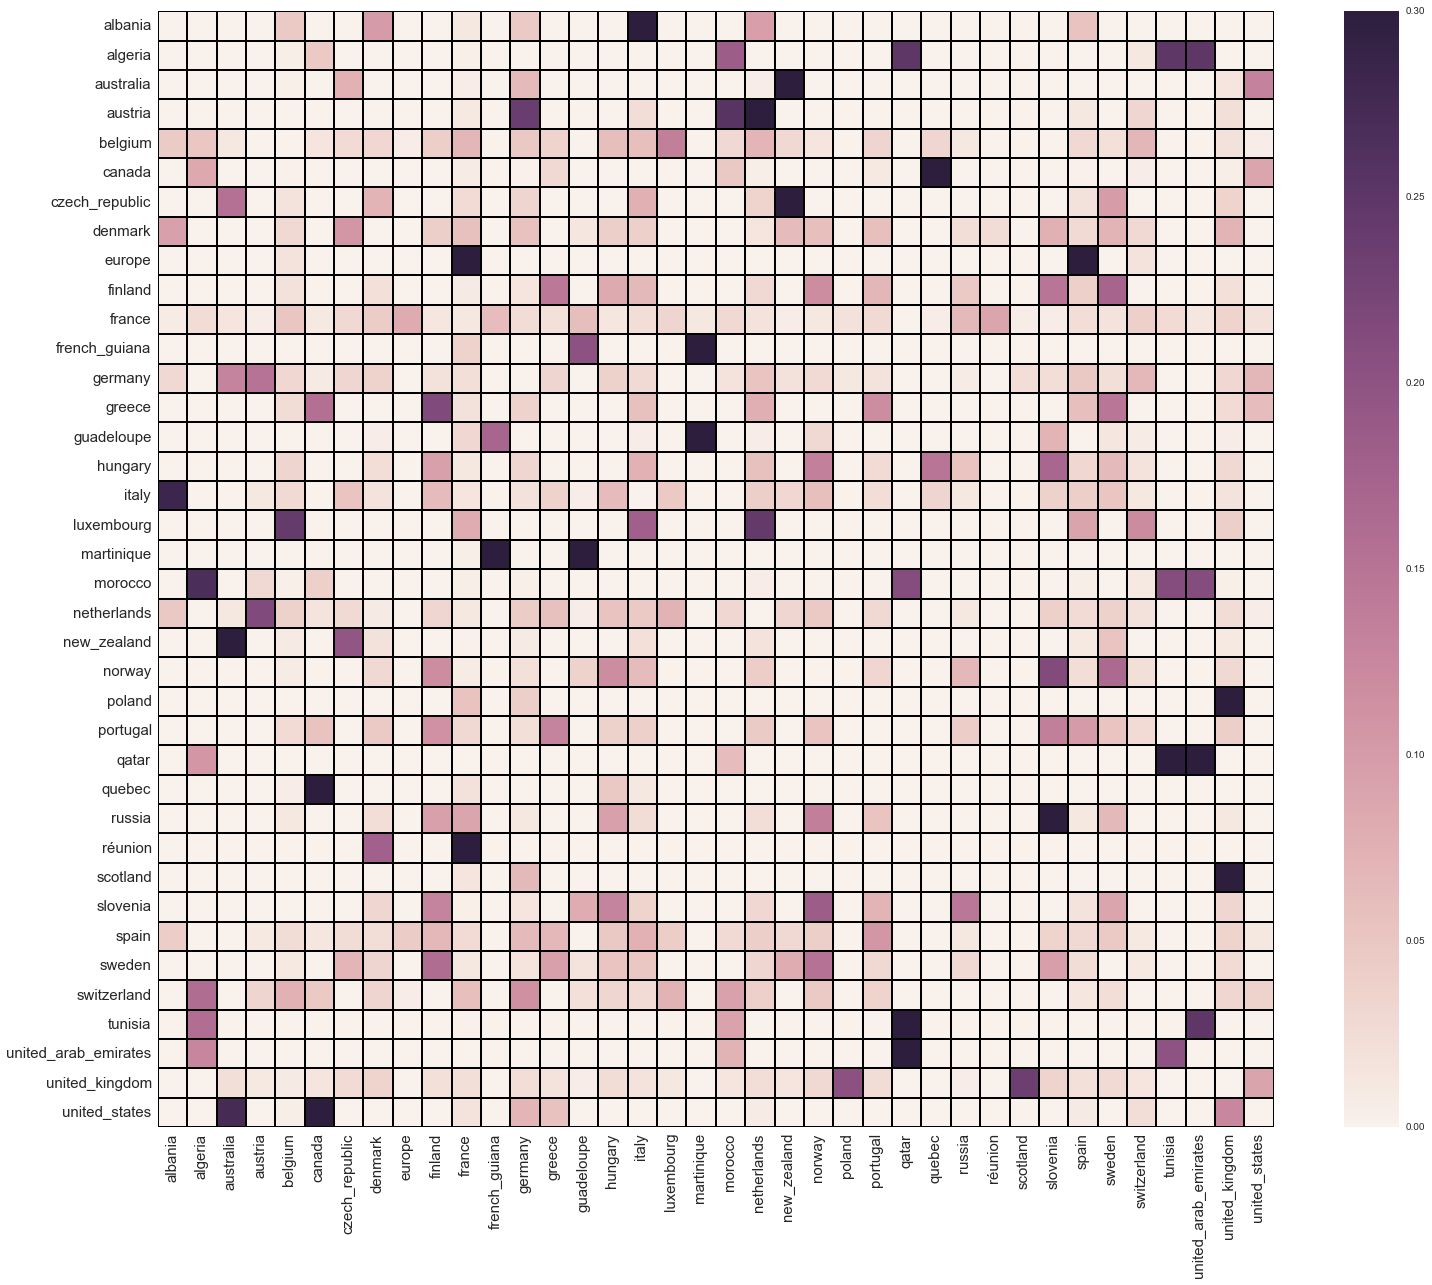

In [79]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
ax.tick_params(axis='both', which='major', labelsize=15)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(plot_matrix, vmax=.3, ax=ax, linecolor='black')